# WELL NOTEBOOK
## Well logs visualization &amp; petrophysics

Install the the repository reservoirpy from github and import the required packages

In [18]:
import os
path = os.path.abspath(os.path.join('..','..','..'))
import sys
sys.path.append(path)
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import folium
from pyproj import Proj, transform, CRS, Transformer
import pyvista as pv
from reservoirpy.wellpy import path as ph


### Well atributes

Well atributes, name, rte, coordinates, survey

In [19]:
deviation = pd.read_csv('survey.csv', header=[0])
deviation.head()

,md,inc,azi
0,0.0,0.00,0.0
1,193.0,0.06,0.0
2,375.0,0.12,0.0
3,559.0,0.33,347.6
4,651.0,0.36,340.5


In [20]:
tops1 = ph.tops({'formation':['fm1','fm2'],'md_top':[5000,5100],'md_bottom':[5099,5145]})
tops1

,md_top,md_bottom
formation,,
fm1,5000,5099
fm2,5100,5145


## Create some wells

In [21]:
#Create the well object
name1 = 'well-1'
rte1 = 1515.78 # Rotary table Elevation
surf_coord1 = [1000000,1000000]#Point(1000100,1000000,520)
crs1 = 'EPSG:3117'
tops1 = ph.tops({'formation':['fm1','fm2'],'md_top':[12000,12100],'md_bottom':[12099,12145]})
deviation1 = deviation.copy()
deviation1['azi'] = deviation1['azi'] + 0

w1 = ph.well(name=name1, 
             rte=rte1, 
             surf_coord=surf_coord1, 
             survey = deviation1,
             tops=tops1,
             crs=crs1)


#Create the well object
name2 = 'well-2'
rte2 = 515 # Rotary table Elevation
surf_coord2 = Point(1000100,1000000)
crs2 = 'EPSG:3117'
tops2 = ph.tops({'formation':['fm1','fm2'],'md_top':[12000,12100],'md_bottom':[12099,12145]})
deviation2 = deviation.copy()
deviation2['azi'] = deviation1['azi'] + 0

w2 = ph.well(name=name2, 
             rte=rte2, 
             surf_coord=surf_coord2,
             survey = deviation2,
             tops=tops2,
             crs=crs2)


#Create the well object
name3 = 'well-3'
rte3 = 515 # Rotary table Elevation
surf_coord3 = Point(1000500,1000000)
crs3 = 'EPSG:3117'
tops3 = ph.tops({'formation':['fm1','fm2'],'md_top':[12000,12100],'md_bottom':[12099,12145]})
deviation3 = deviation.copy()
deviation3['azi'] = deviation1['azi'] + 30

w3 = ph.well(name=name3, 
             rte=rte3, 
             surf_coord=surf_coord3,
             survey = deviation3,
             tops=tops3,
             crs=crs3)

## Create an empty wells group

You can create a `wells_group` object either empty or not. It only receives `well` object.

In [22]:
g1 = ph.wells_group(w1)

To see the list of wells call the method `wells_group.wells`. It contains a dictionary with the name of each well as the key and the `well` object as the item

In [23]:
g1.wells

{'well-1': <reservoirpy.wellpy.path.wells.well at 0x7fd141caa990>}

### Add more wells to existing list

by calling the method `wells_group.add_well()` you can add more wells to an existing group

In [24]:
g1.add_well(w2,w3)
g1.wells

{'well-1': <reservoirpy.wellpy.path.wells.well at 0x7fd141caa990>,
 'well-2': <reservoirpy.wellpy.path.wells.well at 0x7fd141caaa90>,
 'well-3': <reservoirpy.wellpy.path.wells.well at 0x7fd141c942d0>}

### Get attributes from a `wells_group`

In [25]:
g1.wells['well-3'].surf_coord.wkt

'POINT (1000500 1000000)'

### Describe each well with its attributes

In [26]:
g1.describe()

,rte,surf_coord,crs,survey,perforations,tops,openlog,masterlog,caselog
well-1,1515.78,POINT (1000000.000 1000000.000),EPSG:3117,True,False,True,False,False,False
well-2,515.00,POINT (1000100.000 1000000.000),EPSG:3117,True,False,True,False,False,False
well-3,515.00,POINT (1000500.000 1000000.000),EPSG:3117,True,False,True,False,False,False


#### Wells tops

Get the wells formations tops. If no parameters passed, it returns all wells and formations. You can pass `wells` and `formations` parameter to get the selected wells and formations

In [27]:
g1.wells_tops()

,formation,md_top,md_bottom,tvd_top,tvd_bottom,tvd_tick,tvdss_top,tvdss_bottom,northing,easting,geometry,well
0,fm1,12000,12099,11769.039476,11862.764382,93.724906,-10253.259476,-10346.984382,999560.336081,9.999743e+05,POINT (999974.312 999560.336),well-1
1,fm2,12100,12145,11863.712479,11906.390781,42.678303,-10347.932479,-10390.610781,999550.532263,9.999739e+05,POINT (999973.871 999550.532),well-1
2,fm1,12000,12099,11769.039476,11862.764382,93.724906,-11254.039476,-11347.764382,999560.336081,1.000074e+06,POINT (1000074.312 999560.336),well-2
3,fm2,12100,12145,11863.712479,11906.390781,42.678303,-11348.712479,-11391.390781,999550.532263,1.000074e+06,POINT (1000073.871 999550.532),well-2
4,fm1,12000,12099,11769.039476,11862.764382,93.724906,-11254.039476,-11347.764382,999632.083642,1.000258e+06,POINT (1000257.922 999632.084),well-3
5,fm2,12100,12145,11863.712479,11906.390781,42.678303,-11348.712479,-11391.390781,999623.814231,1.000253e+06,POINT (1000252.637 999623.814),well-3


In [28]:
g1.wells_tops(wells=['well-1','well-2'], formations=['fm1'])

,formation,md_top,md_bottom,tvd_top,tvd_bottom,tvd_tick,tvdss_top,tvdss_bottom,northing,easting,geometry,well
0,fm1,12000,12099,11769.039476,11862.764382,93.724906,-10253.259476,-10346.984382,999560.336081,9.999743e+05,POINT (999974.312 999560.336),well-1
1,fm1,12000,12099,11769.039476,11862.764382,93.724906,-11254.039476,-11347.764382,999560.336081,1.000074e+06,POINT (1000074.312 999560.336),well-2


#### Wells survey

In [29]:
g1.wells_surveys().head()

,md,inc,azi,tvd,tvdss,north_offset,east_offset,northing,easting,dleg,geometry,well
0,0.0,0.00,0.0,0.000000,1515.780000,0.000000,0.000000,1.000000e+06,1000000.000000,0.000000,POINT (1000000.000 1000000.000),well-1
1,193.0,0.06,0.0,192.999965,1322.780035,0.101055,0.000000,1.000000e+06,1000000.000000,0.031088,POINT (1000000.000 1000000.031),well-1
2,375.0,0.12,0.0,374.999732,1140.780268,0.386939,0.000000,1.000000e+06,1000000.000000,0.032967,POINT (1000000.000 1000000.118),well-1
3,559.0,0.33,347.6,558.998219,956.781781,1.097142,-0.113784,1.000000e+06,999999.965319,0.116497,POINT (999999.965 1000000.334),well-1
4,651.0,0.36,340.5,650.996554,864.783446,1.628348,-0.267154,1.000000e+06,999999.918571,0.056709,POINT (999999.919 1000000.496),well-1


In [40]:
g1.wells_surveys(wells=['well-1','well-2'])

,md,inc,azi,tvd,tvdss,north_offset,east_offset,northing,easting,dleg,geometry,well
0,0.0,0.00,0.00,0.000000,1515.780000,0.000000,0.000000,1.000000e+06,1.000000e+06,0.000000,POINT (1000000.000 1000000.000),well-1
1,193.0,0.06,0.00,192.999965,1322.780035,0.101055,0.000000,1.000000e+06,1.000000e+06,0.031088,POINT (1000000.000 1000000.031),well-1
2,375.0,0.12,0.00,374.999732,1140.780268,0.386939,0.000000,1.000000e+06,1.000000e+06,0.032967,POINT (1000000.000 1000000.118),well-1
3,559.0,0.33,347.60,558.998219,956.781781,1.097142,-0.113784,1.000000e+06,1.000000e+06,0.116497,POINT (999999.965 1000000.334),well-1
4,651.0,0.36,340.50,650.996554,864.783446,1.628348,-0.267154,1.000000e+06,9.999999e+05,0.056709,POINT (999999.919 1000000.496),well-1
...,...,...,...,...,...,...,...,...,...,...,...,...
132,12222.0,18.48,183.46,11979.483886,-11464.483886,-1513.062040,-87.705754,9.995388e+05,1.000073e+06,0.422310,POINT (1000073.267 999538.819),well-2
133,12312.0,18.32,183.53,12064.882700,-11549.882700,-1541.417598,-89.437497,9.995302e+05,1.000073e+06,0.179465,POINT (1000072.739 999530.176),well-2
134,12401.0,18.66,183.58,12149.288309,-11634.288309,-1569.588577,-91.187763,9.995216e+05,1.000072e+06,0.382438,POINT (1000072.206 999521.589),well-2
135,12488.0,19.28,182.83,12231.562968,-11716.562968,-1597.825002,-92.765977,9.995130e+05,1.000072e+06,0.765749,POINT (1000071.725 999512.983),well-2


In [34]:
g1.wells_distance(dims=['z'])

,well-1,well-2,well-3
well-1,0.000000,305.037744,305.037744
well-2,305.037744,0.000000,0.000000
well-3,305.037744,0.000000,0.000000


In [37]:
dist = g1.wells_distance(wells=['well-1','well-2'],dims=['y','z','x'])
dist

,well-1,well-2
well-1,0.000000,321.010943
well-2,321.010943,0.000000


In [38]:
m = g1.wells_map(zoom=13)
m

In [45]:
g1.wells_coordinates()

,x,y,z,geometry,lon,lat
well-1,1000000.0,1000000.0,462.009744,POINT (-71.07751 4.59620),-71.077508,4.5962
well-2,1000100.0,1000000.0,156.972000,POINT (-71.07661 4.59620),-71.076607,4.5962
well-3,1000500.0,1000000.0,156.972000,POINT (-71.07300 4.59620),-71.073002,4.5962


In [48]:
g1.wells_tops().head()

,md_top,md_bottom,tvd_top,tvd_bottom,tvd_tick,tvdss_top,tvdss_bottom,northing,easting,geometry,well
formation,,,,,,,,,,,
fm1,12000,12099,11769.039476,11862.764382,93.724906,-10253.259476,-10346.984382,999560.336081,9.999743e+05,POINT (999974.312 999560.336),well-1
fm2,12100,12145,11863.712479,11906.390781,42.678303,-10347.932479,-10390.610781,999550.532263,9.999739e+05,POINT (999973.871 999550.532),well-1
fm1,12000,12099,11769.039476,11862.764382,93.724906,-11254.039476,-11347.764382,999560.336081,1.000074e+06,POINT (1000074.312 999560.336),well-2
fm2,12100,12145,11863.712479,11906.390781,42.678303,-11348.712479,-11391.390781,999550.532263,1.000074e+06,POINT (1000073.871 999550.532),well-2
fm1,12000,12099,11769.039476,11862.764382,93.724906,-11254.039476,-11347.764382,999632.083642,1.000258e+06,POINT (1000257.922 999632.084),well-3


In [52]:
g1.formation_distance(formation='fm2')

well,well-1,well-2,well-3
well,,,
well-1,0.000000,321.010943,419.677503
well-2,321.010943,0.000000,193.204087
well-3,419.677503,193.204087,0.000000


In [44]:
g1.formation_distance(wells=['well-1','well-2','well-3'],formation='fm2', dims=['tvdss_top'])

well,well-1,well-2,well-3
well,,,
well-1,0.000000,305.037744,305.037744
well-2,305.037744,0.000000,0.000000
well-3,305.037744,0.000000,0.000000


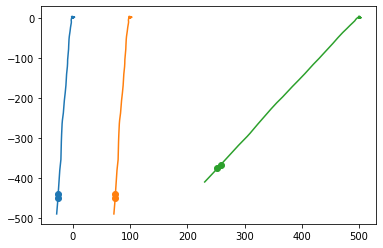

In [53]:
fig, ax = plt.subplots()

for i in g1.wells:
    _t = g1.wells[i].tops
    _s = g1.wells[i].survey
    ax.scatter(_t['easting']-1000000,_t['northing']-1000000)
    ax.plot(_s['easting']-1000000,_s['northing']-1000000)

In [56]:
df, c = g1.wells_tops(projection1d=True, azi=45)
print(c)
print(df)

[1000101.15424695  999579.60576028]
  formation  md_top  md_bottom       tvd_top    tvd_bottom   tvd_tick  \
0       fm1   12000      12099  11769.039476  11862.764382  93.724906   
1       fm2   12100      12145  11863.712479  11906.390781  42.678303   
2       fm1   12000      12099  11769.039476  11862.764382  93.724906   
3       fm2   12100      12145  11863.712479  11906.390781  42.678303   
4       fm1   12000      12099  11769.039476  11862.764382  93.724906   
5       fm2   12100      12145  11863.712479  11906.390781  42.678303   

      tvdss_top  tvdss_bottom       northing       easting  \
0 -10253.259476 -10346.984382  999560.336081  9.999743e+05   
1 -10347.932479 -10390.610781  999550.532263  9.999739e+05   
2 -11254.039476 -11347.764382  999560.336081  1.000074e+06   
3 -11348.712479 -11391.390781  999550.532263  1.000074e+06   
4 -11254.039476 -11347.764382  999632.083642  1.000258e+06   
5 -11348.712479 -11391.390781  999623.814231  1.000253e+06   

                 

In [57]:
surv,ce = g1.wells_surveys(projection1d=True, azi=45, center=c)
print(surv)

          md    inc     azi           tvd         tvdss  north_offset  \
0        0.0   0.00    0.00      0.000000   1515.780000      0.000000   
1      193.0   0.06    0.00    192.999965   1322.780035      0.101055   
2      375.0   0.12    0.00    374.999732   1140.780268      0.386939   
3      559.0   0.33  347.60    558.998219    956.781781      1.097142   
4      651.0   0.36  340.50    650.996554    864.783446      1.628348   
..       ...    ...     ...           ...           ...           ...   
132  12222.0  18.48  213.46  11979.483886 -11464.483886  -1266.497287   
133  12312.0  18.32  213.53  12064.882700 -11549.882700  -1290.188049   
134  12401.0  18.66  213.58  12149.288309 -11634.288309  -1313.709700   
135  12488.0  19.28  212.83  12231.562968 -11716.562968  -1337.374054   
136  12520.0  19.00  212.50  12261.793994 -11746.793994  -1346.206546   

     east_offset      northing       easting      dleg  \
0       0.000000  1.000000e+06  1.000000e+06  0.000000   
1      

In [61]:
azi= 0

tops, center = g1.wells_tops(projection1d=True, azi=azi)
surv,ce = g1.wells_surveys(projection1d=True, azi=azi, center=center)

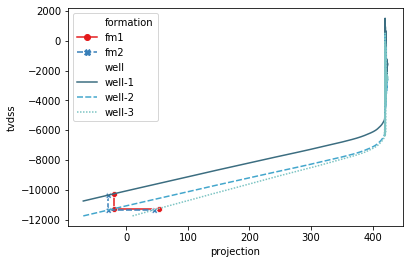

In [62]:
fig, ax =  plt.subplots()
sns.lineplot(x='projection',y='tvdss_top', data=tops, 
                hue='formation', style='formation',markers=True, ax=ax, palette='Set1')

sns.lineplot(x='projection',y='tvdss', data=surv, 
                hue='well', style='well', ax=ax,palette='GnBu_d')

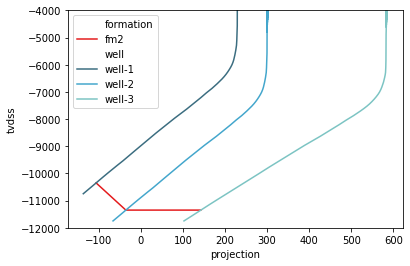

In [48]:

g1.structural_view(azi=45,ylims=[-4000,-12000],formations=['fm2'])

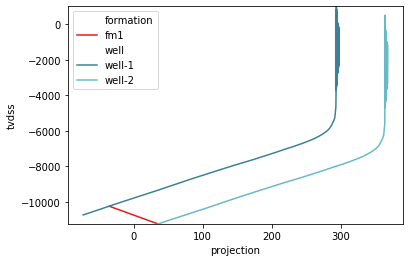

In [70]:
g1.structural_view(azi=45,formations=['fm1'], wells=['well-1','well-2'])

## Export wells survey to PyVista object vtk

In [72]:
w1_vtk = g1.wells['well-1'].get_vtk()
w1_vtk

PolyData (0x7fd1410d7600)
  N Cells:	136
  N Points:	137
  X Bounds:	1.000e+06, 1.000e+06
  Y Bounds:	9.995e+05, 1.000e+06
  Z Bounds:	-1.075e+04, 1.516e+03
  N Arrays:	9

In [75]:
w1_vtk.plot(notebook=False)

[(999666.7089782311, 999484.6485869153, 2927.033389249602),
 (999987.2865798048, 999756.7997870044, -4615.1169970913425),
 (-0.27751124769324725, -0.9596001893699134, -0.0464218048438812)]

In [80]:
ss=g1.wells_surveys_vtk()

ss.plot(notebook=False)

[(1000250.2671489477, 1000795.6828422967, 2994.202881484691),
 (1000237.5486438649, 999756.9523065898, -5115.506997091343),
 (-0.6020281362593035, -0.7918850758660543, 0.10237260264720695)]

In [84]:
p=pv.Plotter(notebook=False)
p.add_mesh(ss['well-1'], scalars='azi')
p.add_mesh(ss['well-2'], scalars='tvdss')
p.show() 

[(1000190.5405940494, 1000372.5856833332, -2030.2762640327364),
 (1000037.2865798048, 999756.7997870044, -5115.506997091343),
 (-0.6844792689334893, -0.7076567781582116, 0.1752427308820989)]

In [90]:
tops_vtk = g1.tops_vtk()
tops_vtk.plot(notebook=False)

[(1000444.349853906, 1001811.2816527236, -13095.029822658653),
 (1000115.8962843373, 999591.3079527195, -10800.985977462957),
 (-0.5476114670720029, 0.639103688737251, 0.5400631038811001)]

In [91]:
str_vtk = g1.structural_view_vtk()
str_vtk.plot(notebook=False)

[(1000239.3782145374, 999762.8042163549, -5058.274612518931),
 (1000237.5486438649, 999756.9523065898, -5115.506997091343),
 (-0.554530868399353, -0.8258672598026414, 0.10217037329057838)]